In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import datetime, time
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np

path = os.getcwd()
os.makedirs(path + "/DatosLimpiosYOutliers", exist_ok=True)

def fechadatetime(df):
    fechahoras = []
    fechas=[]
    for _,row in df.iterrows():
        fecha = str(int(row.DIA))+"/"+\
                str(int(row.MES))+"/"+\
                str(int(row.ANO))
        fechahora = fecha+"-"+str(int(row.HORA-1)) # para que sea de 0 a 23
        #print(fechahora)
        fechahoras.append(datetime.datetime.strptime(fechahora,"%d/%m/%Y-%H"))
        fechas.append(fecha)
    df['FECHAH'] = fechahoras
    df['FECHA'] = fechas
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    return df

In [3]:
#Leemos el fichero de github.
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase%202/DatosLimpios/Contaminacion.csv"
df =  pd.read_csv(fichero)
magnitudes = ['CO','NO','NO2','PM2.5','PM10','NOx','O3']
df = fechadatetime(df)
df

,DIA,MES,ANO,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,FECHAH,FECHA
0,1,1,2019,1,0.6,81,73,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01
1,1,1,2019,2,0.8,124,82,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01
2,1,1,2019,3,0.7,93,72,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01
3,1,1,2019,4,0.6,86,66,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01
4,1,1,2019,5,0.6,79,64,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,30,9,2021,20,0.3,27,80,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30
24044,30,9,2021,21,1.1,168,153,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30
24045,30,9,2021,22,1.0,179,157,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30
24046,30,9,2021,23,0.8,115,133,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30


###### Visualizacion de los valores nulos en una matriz.

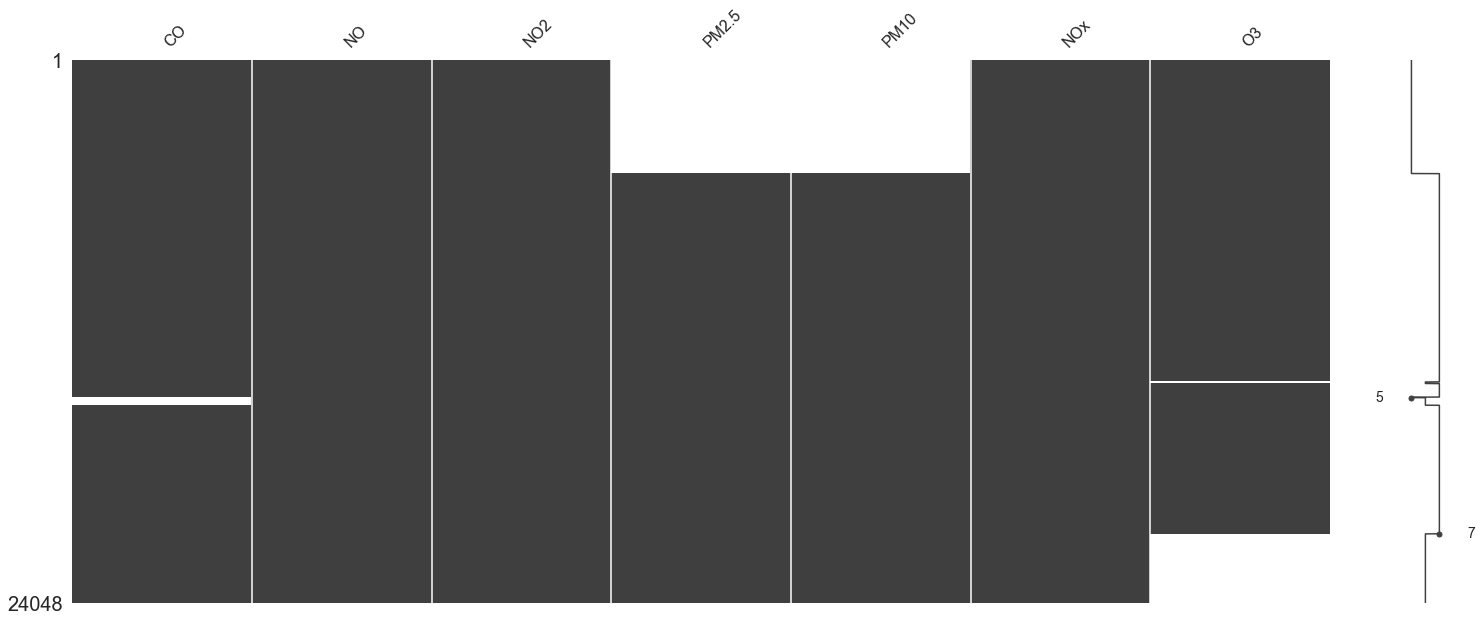

In [4]:
sns.set()
df_contaminantes = df.iloc[:,4:11]
# Visualizar los valores nulos.
msno.matrix(df_contaminantes).autoscale()

###### Visualizacion de los valores nulos mediante barras.

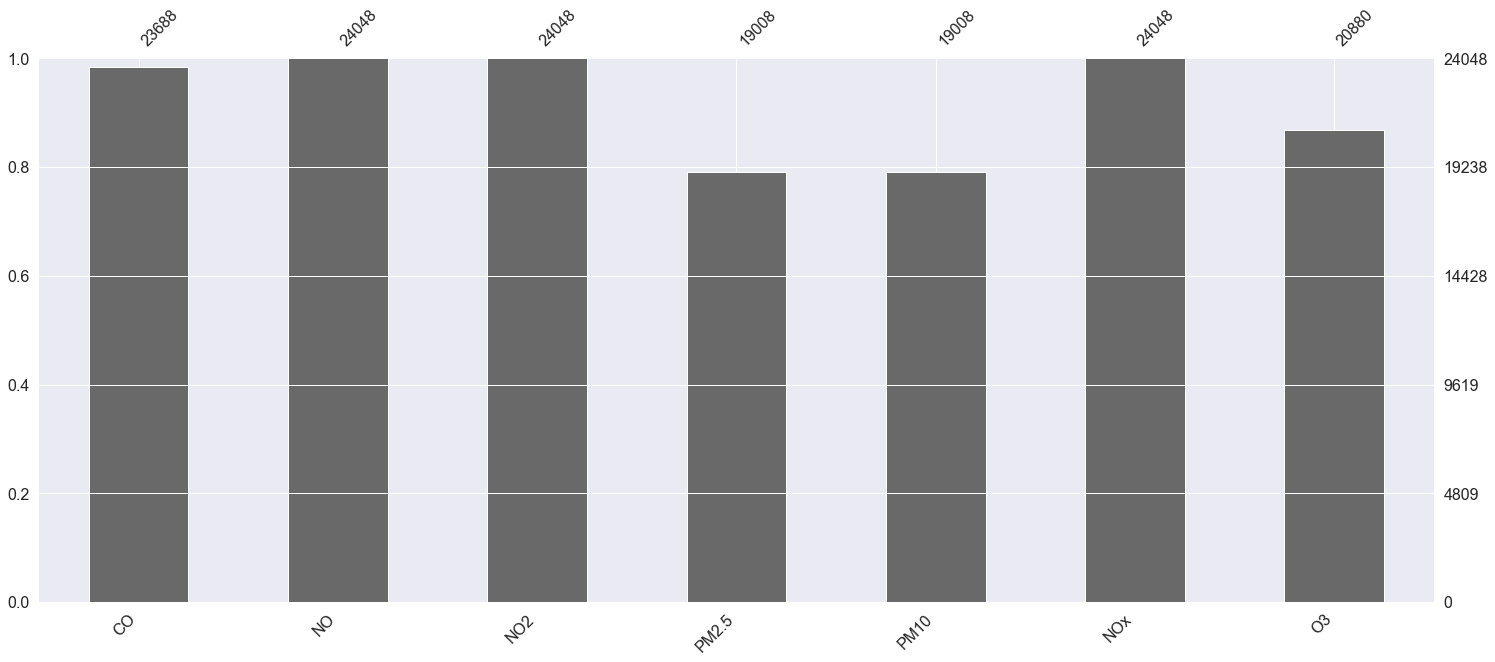

In [5]:
#Seleccionamos todas las filas y de la columna 4 al final
df_small = df.iloc[:,4:11]
df1 = msno.bar(df_small)

###### QUITAR 0's
convertir 0's a NA
Observar que los ceros se comportan como fondos planos, por lo que la decision es transformar los 0 en NA.

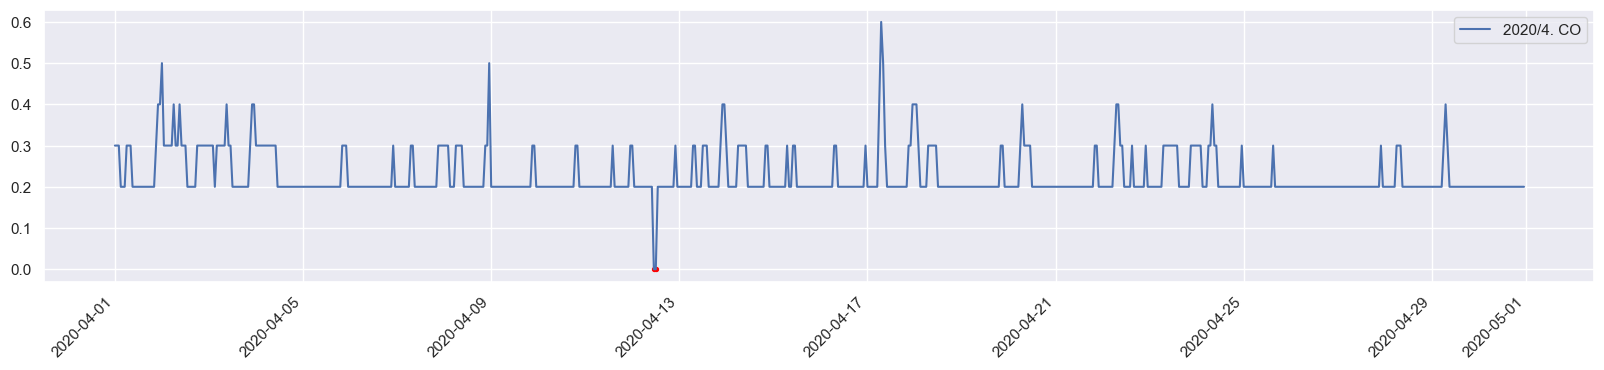

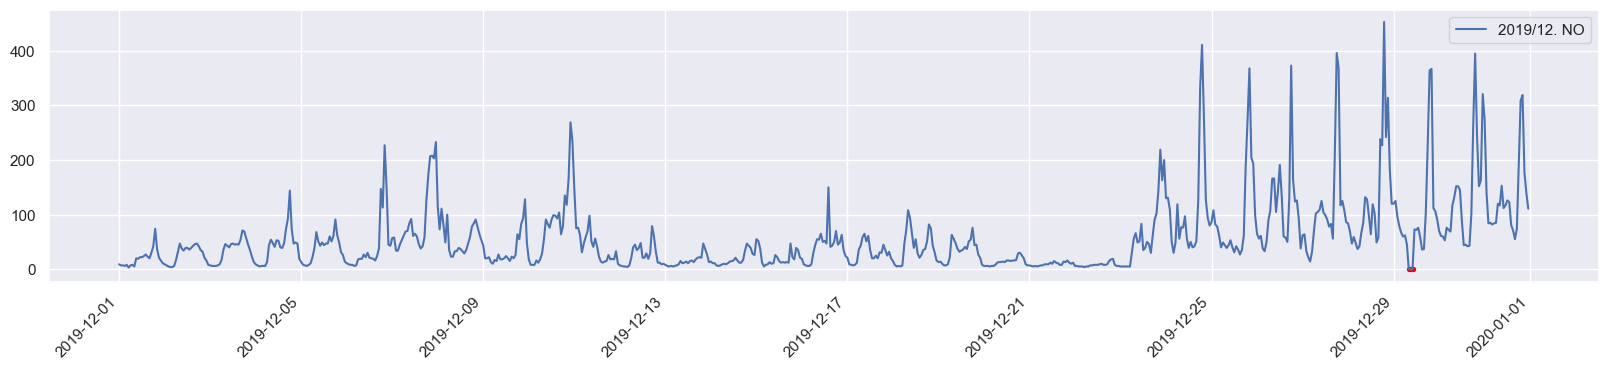

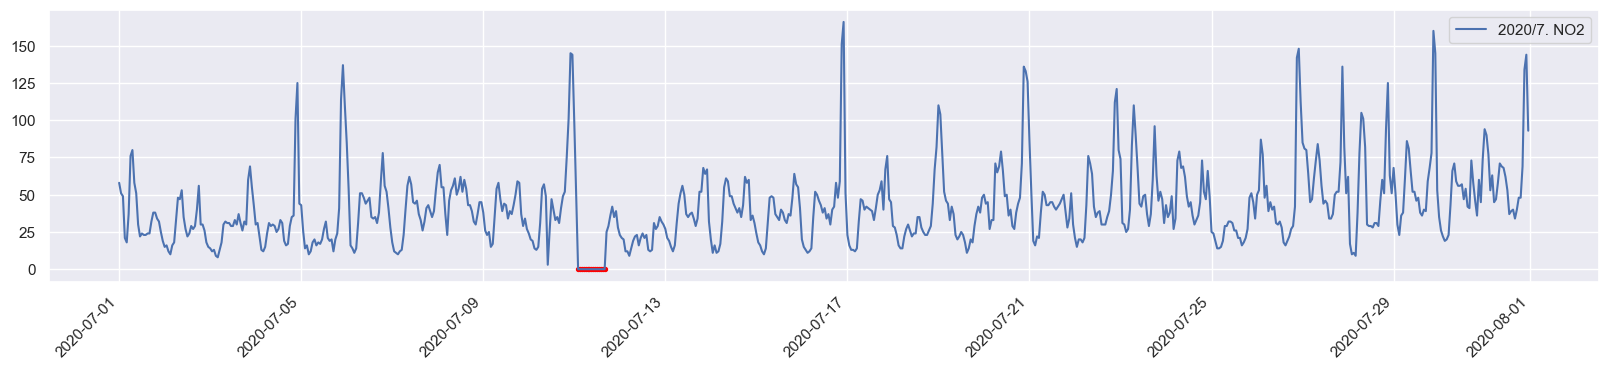

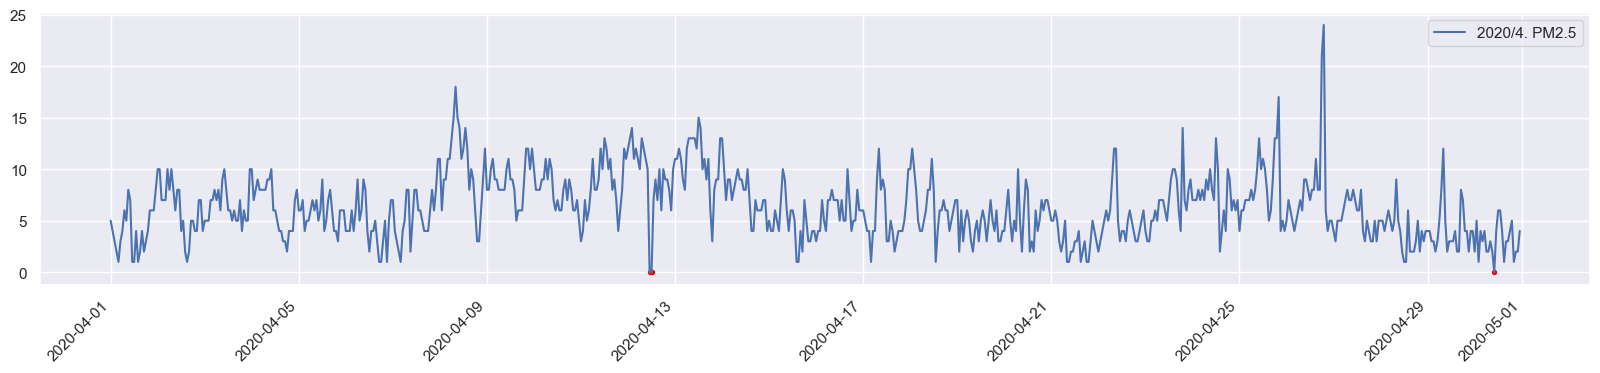

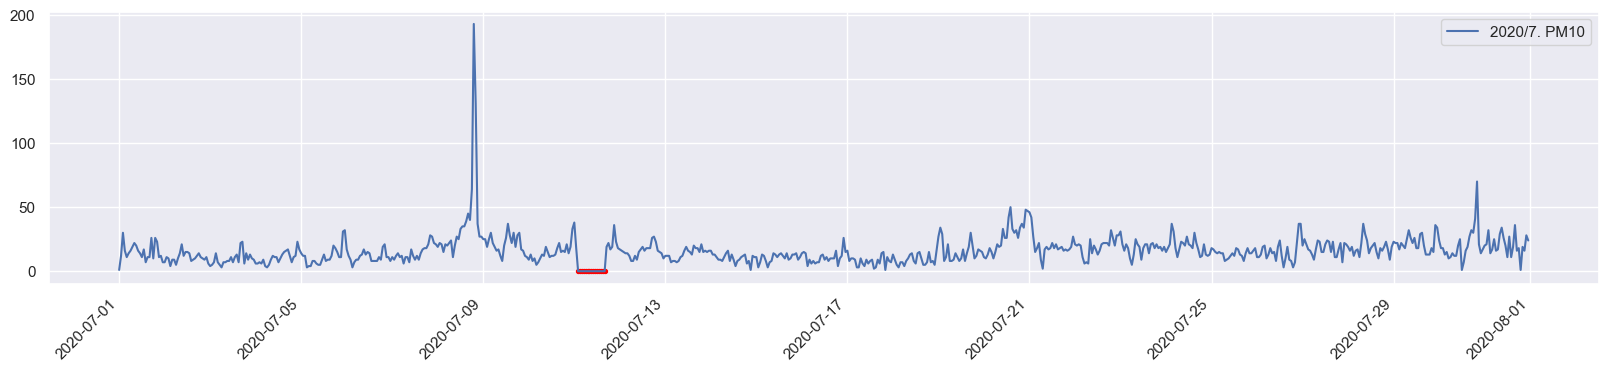

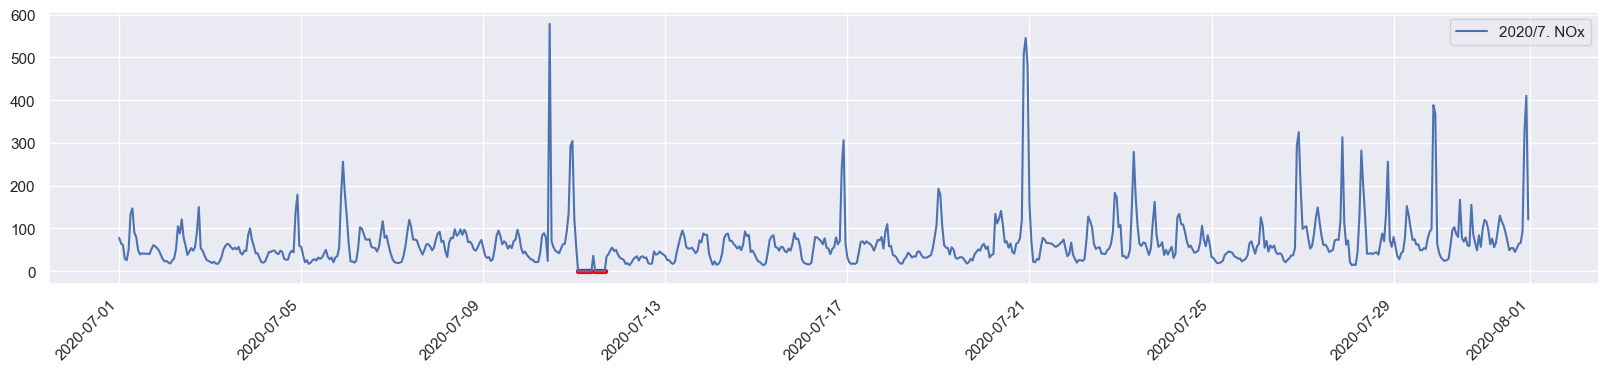

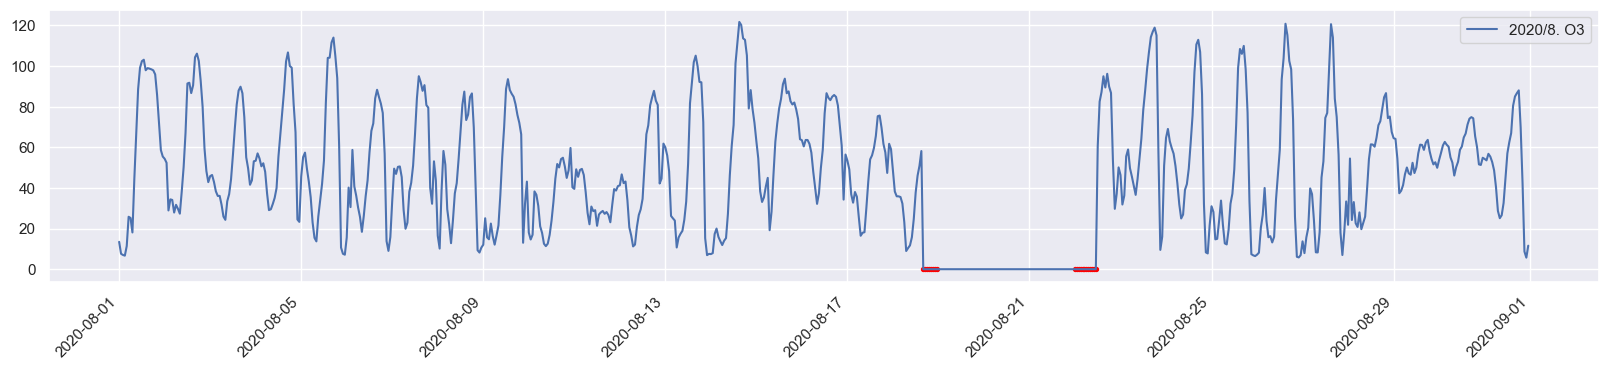

In [6]:
dfNoNa = df.dropna()
# muestra el mes al que pertenece la fila
def muestraMes(df,row,c):
    month = row.MES
    year = row.ANO
    dfmes = df[(df.MES==month) & (df.ANO==year)]
    fig, ax = plt.subplots(1,figsize=(20, 4),dpi=100)
    ax.plot(dfmes.FECHAH,dfmes[c],label=str(int(year))+"/"+str(int(month))+". "+c)
    ceros = dfmes[dfmes[c]==0]
    ax.scatter(ceros.FECHAH,ceros[c],color="red",s=8)
    if row[c]!=0: # señalar el día
        ax.scatter(row.FECHAH,row[c],color="green",s=20)
    fig.autofmt_xdate(rotation=45)
    plt.legend()
    plt.show()
    
for c in magnitudes:
    dfc0 = dfNoNa[dfNoNa[c]==0]
    if len(dfc0)>0:
        row =dfc0.iloc[random.randint(0,len(dfc0)-1)] #De todos los valores 0´s 
        muestraMes(dfNoNa,row,c)

In [7]:
# convertir 
magnitudes = ['CO','NO','NO2','PM2.5','PM10','NOx','O3']
for i,c in enumerate(magnitudes):
    df.iloc[(df[c]<=0).values,i] = pd.NA

# Histogramas con Boxplots

CO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


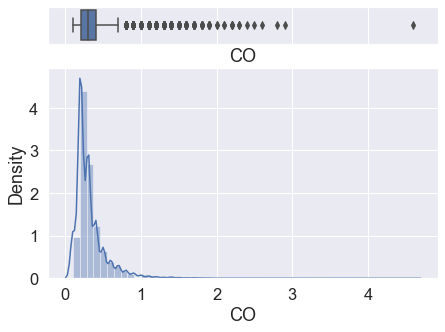

NO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


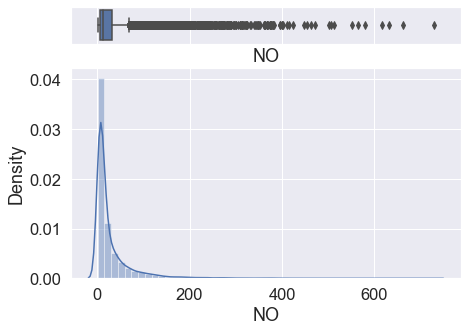

NO2


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


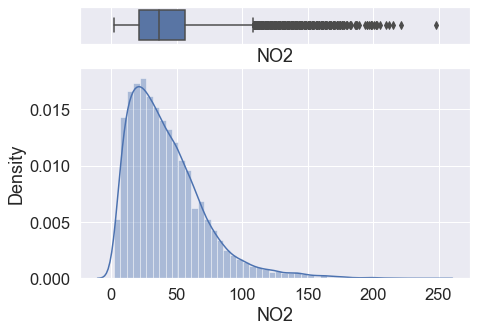

PM2.5


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


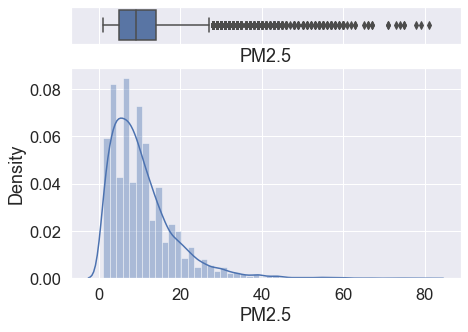

PM10


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


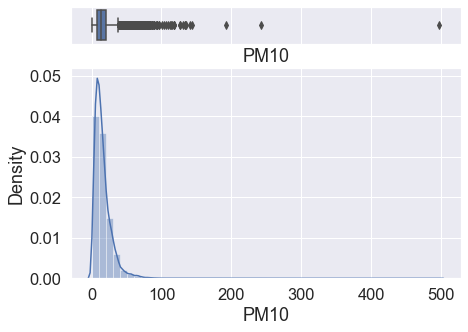

NOx


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


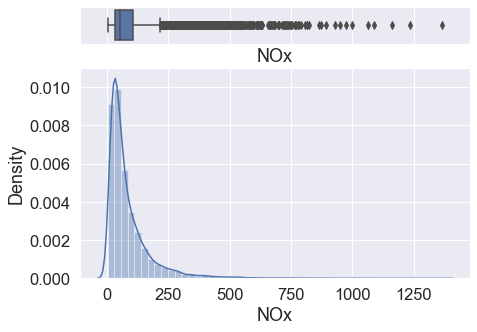

O3


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


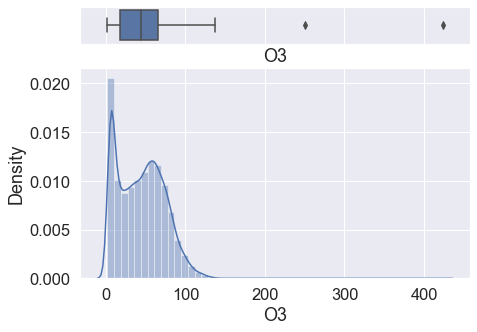

In [8]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.5, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()


def histogramas(df):
    dfNoNa = df.dropna()    
    for c in magnitudes:
        print(c)
        histogram_boxplot(dfNoNa[c],c)
        
histogramas(df)

###### Buscamos Los outlayers
Buscamos la media de los datos en dias similares. (lo hacemos distinguiendo entre drias laborables sabados y domingos)

In [9]:
festivos = pd.read_csv("https://raw.githubusercontent.com/albercol/TFG/main/Fase%201.3/Festividades/FESTIVOS.csv",sep=";")
festivos.columns = ["FECHA","DIA","TIPO","FESTIVIDAD","NOM_FESTIVIDAD"]

# los huecos en tipo parecen ser todos días laborables
festivos["TIPO"].fillna("laborable", inplace=True)
#eliminabos los nulos de FECHA y DIA.
festivos.dropna(subset=["FECHA","DIA"],inplace=True)

#Convertimos FECHA a dateTime 
festivos["FECHA"] = pd.to_datetime(festivos['FECHA'])

#Transformamos la columna tipo en mayúsculas.
festivos["TIPO"] = festivos["TIPO"].str.upper()

#Filtramos el dataframe quedandonos solo con las columnas FECHA y TIPO
festivoscols = festivos[["FECHA","TIPO"]]

# añadir la información de un dataframe al otro
# left join
df = df.merge(festivoscols, on='FECHA', how = 'left')
df

,DIA,MES,ANO,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,FECHAH,FECHA,TIPO
0,1,1,2019,1,0.6,81,73,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01,FESTIVO
1,1,1,2019,2,0.8,124,82,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01,FESTIVO
2,1,1,2019,3,0.7,93,72,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01,FESTIVO
3,1,1,2019,4,0.6,86,66,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01,FESTIVO
4,1,1,2019,5,0.6,79,64,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01,FESTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,30,9,2021,20,0.3,27,80,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30,LABORABLE
24044,30,9,2021,21,1.1,168,153,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30,LABORABLE
24045,30,9,2021,22,1.0,179,157,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30,LABORABLE
24046,30,9,2021,23,0.8,115,133,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30,LABORABLE


In [10]:
#Obtenemos los tipos de día que tenemos en el datafreme
df.TIPO.unique()

array(['FESTIVO', 'LABORABLE', 'SÁBADO', 'DOMINGO'], dtype=object)

CO
Tipo:  LABORABLE mediana  1.9 mad  0.09999999999999998 3


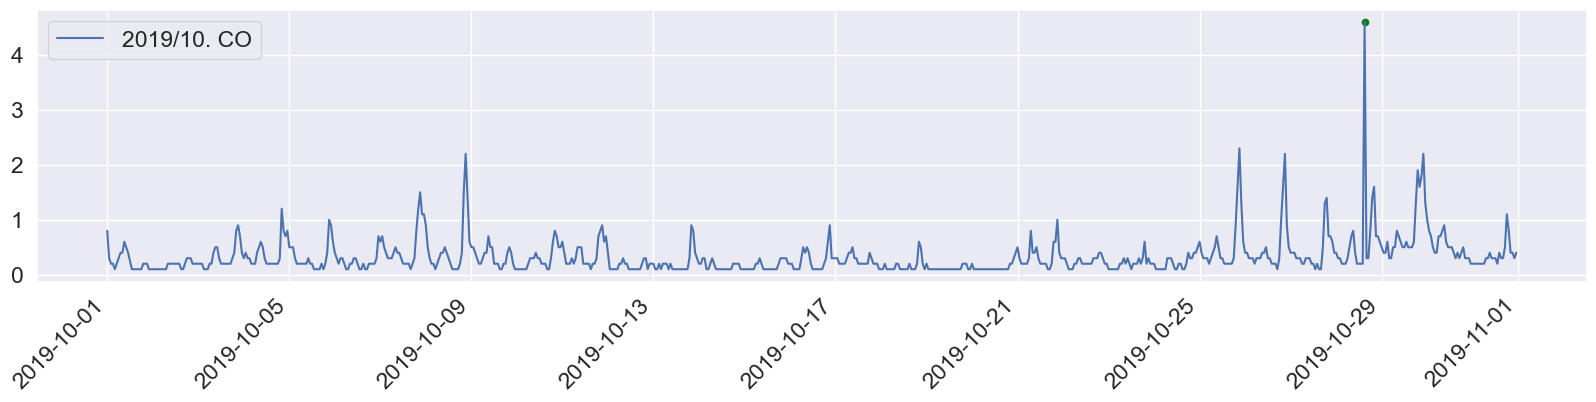

NO
Tipo:  LABORABLE mediana  453.0 mad  9.0 11


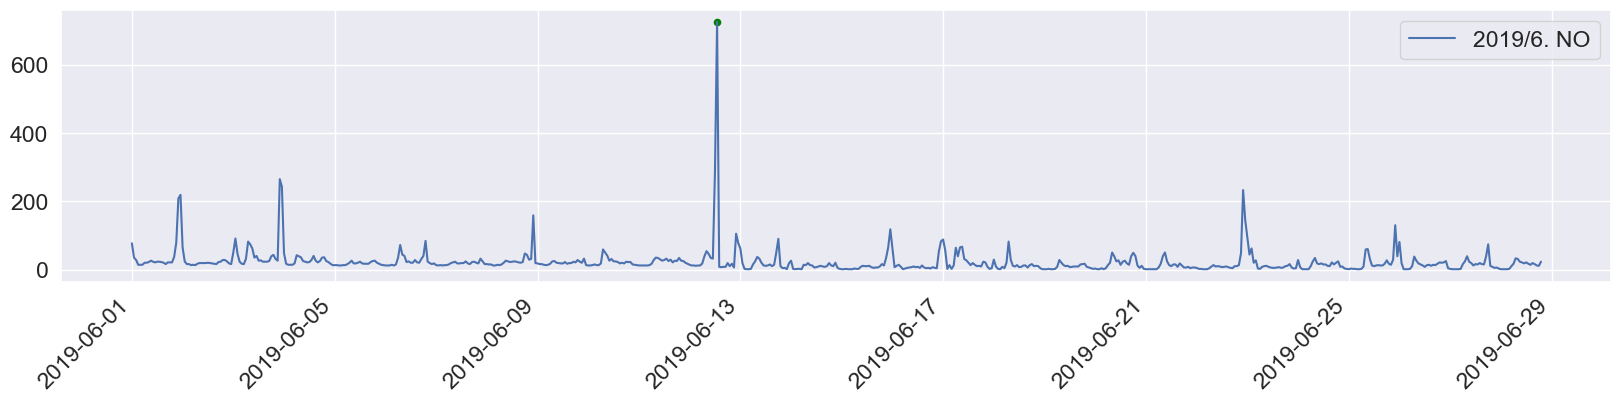

NO2
PM2.5
Tipo:  LABORABLE mediana  56.0 mad  4.0 3


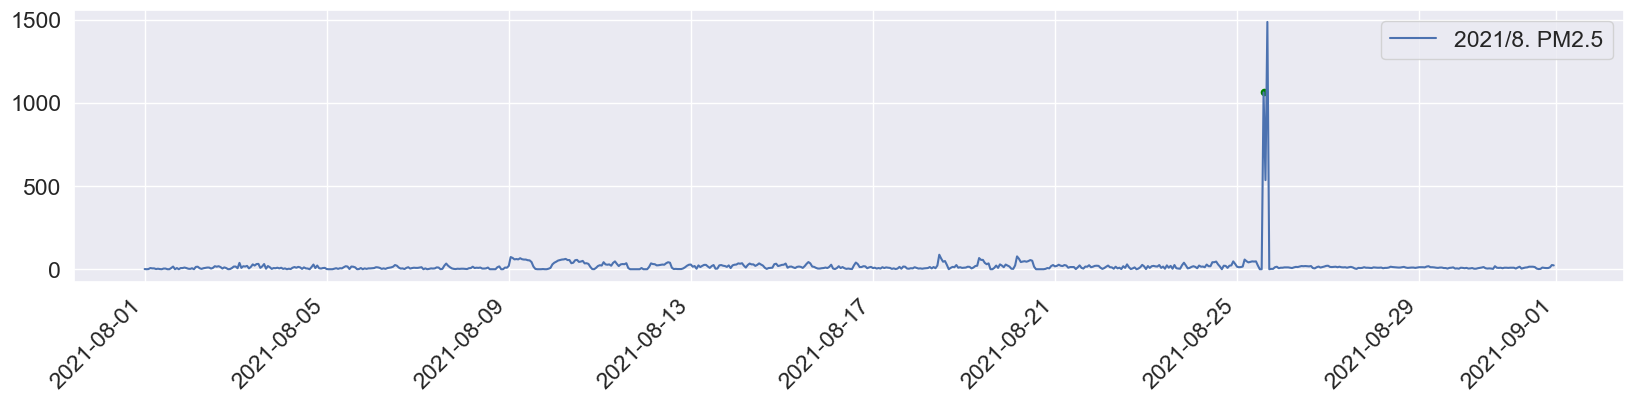

PM10
Tipo:  LABORABLE mediana  84.0 mad  6.0 5


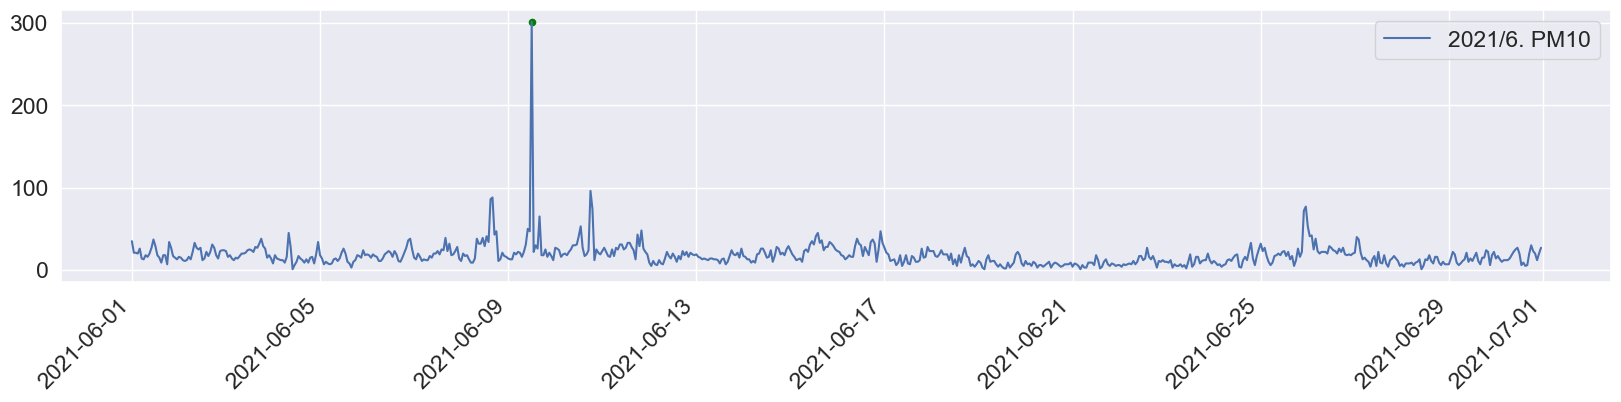

NOx
O3


In [11]:
from scipy import stats
# calculamos los máximos por día
dias = ['LABORABLE', 'SÁBADO', 'DOMINGO']
for c in magnitudes:
    #Imprimimos para cada magnitud CO, NO, NOx...
    print(c)
    for tipo in dias:
        df_tipo = df[(df.TIPO==tipo)].dropna(subset=[c])
        maxdiarios = df_tipo.groupby("DIA")[c].max()
        mediana = maxdiarios.median()
        mad = stats.median_abs_deviation(df_tipo[c], scale=1)
       
        #valores cuya distancia a la mediana superan una cantidad de veces el mad.
        #normalmente el valor a utilizar suele ser 3, que obedece a una función normal perfecta
        #para detección de outliers normales, pero nuestros outliers pertenecen a errores de sensores.
        #de ahí el multiplicar por (3*5 -> 15) la constante mad.
        
        outliers = (df_tipo[c]-mediana)>15*mad
        df_out = df_tipo[outliers]
        if len(df_out)>0:
            print("Tipo: ",tipo,"mediana ",mediana,"mad ",mad,len(df_out))        
            row = df_out.iloc[random.randint(0,len(df_out)-1)]
            #print(row)
            muestraMes(df,row,c)
            #Quitamos el outlayer que esta en df_out.
            df = df[~df.FECHAH.isin(df_out.FECHAH)]

CO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


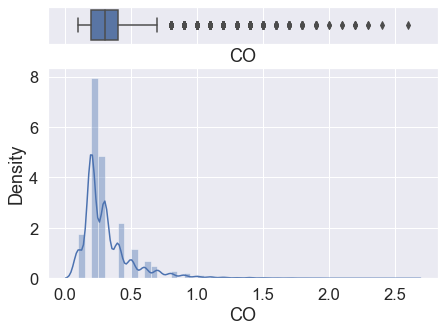

NO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


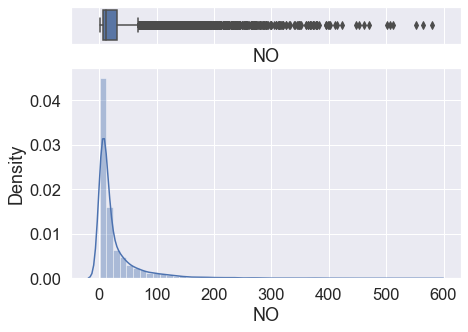

NO2


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


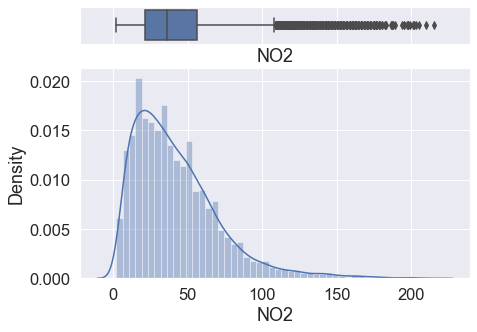

PM2.5


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


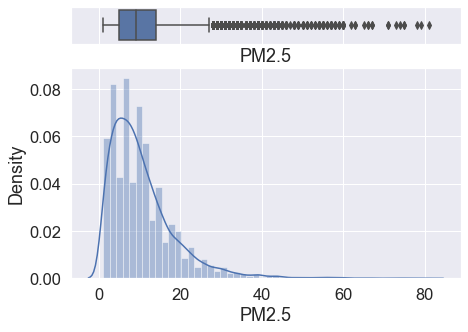

PM10


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


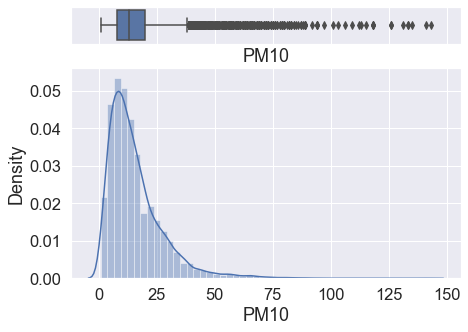

NOx


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


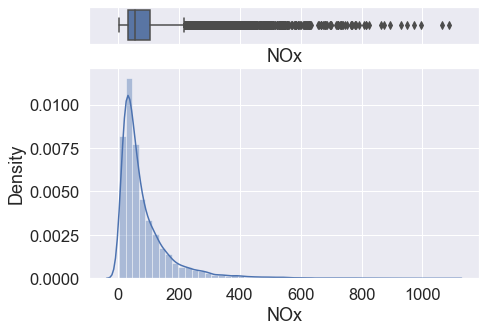

O3


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


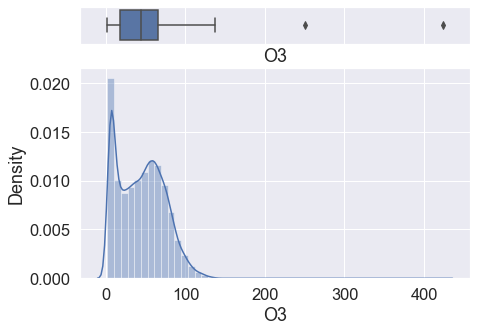

In [12]:
#LLamamos a la funcion anteriror para mostrar el histograma tras quitar outliers.
histogramas(df)

In [70]:
df.to_csv(path+"/DatosLimpiosYOutliers/"+"Contaminacion.csv", header=True, index=False, encoding="utf-8")

###### Correlaciones entre todos los cantaminantes durante todo el año

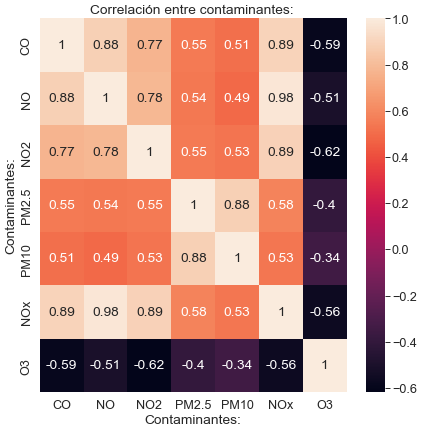

In [14]:
#Seleccionamos todas las filas y de la columna 4 al final
df = pd.read_csv(path+"/DatosLimpiosYOutliers/"+"Contaminacion.csv")
df_small = df.iloc[:,4:11]

correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(9, 9),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.xlabel("Contaminantes:")
plt.ylabel("Contaminantes:")
plt.title("Correlación entre contaminantes: ")
plt.autoscale()